# Assignment 2 Solutions

 ## Problem 1: Plummer Sphere

### Part (a) [50 points] 
Using your own code, generate the point distribution in $(x, y, z, v_x, v_y, v_z)$ phase space for the Plummer sphere with 100,000 points as discussed in lecture and [this lab note](Plummer_Labnote.pdf).
The mass of the sphere is $M=10^{11} M_{\odot}$ and the radius is $a = 1.5$ kpc. 
Note: the `mkplummer` app of Nemo is not acceptable as your solution.

Let's begin by generating random numbers the 7 random numbers per point using NumPy.

Note, that if we want to be left with 100,000 points, we will need to generate more because we will reject some of them. 
Let's try with 300,000.

In [2]:
import numpy as np

# sample 7 random numbers from a uniform distribution [0, 1]
N = 300000
X = np.random.random((N, 7))

# Note, following our "Units" note here: <link>
# 1 mass unit corresponds to 1e11 solar masses
# 1 distance unit corresponds to 1.5 kpc
M_unit = 1e11 # in units of Msolar
a_unit = 1.5 # in units of kpc
v_unit = 5.477e-7 # in units of kpc/yr

For generating the positions of the points, we can use the inverse CDF MC method.

For generating the velocities of the points, we will use the hit-and-miss MC method.

An alternative way to generate the points using hit-and-miss MC method for the entire distribution function is shown in [p1a_generate_distribution.py](p1a_generate_distribution.py).

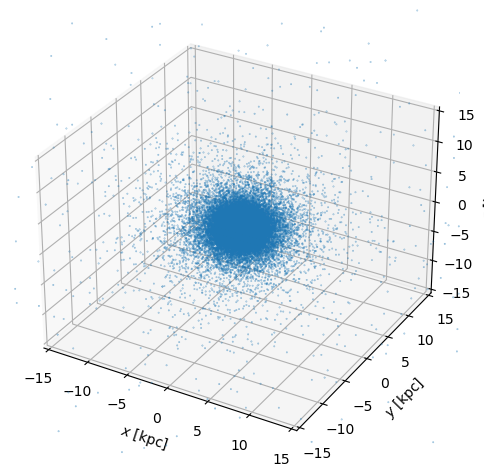

In [3]:
# positions
r = ((X[:,0])**(-2/3) - 1)**(-1/2)
z = (1 - 2 * X[:,1]) * r
x = np.sqrt(r**2 - z**2)*np.cos(2*np.pi*X[:,2])
y = np.sqrt(r**2 - z**2)*np.sin(2*np.pi*X[:,2])

# distribution of velocities
def g(q):
    return q**2*(1-q**2)**(7/2)

ve = np.sqrt(2)*(1+r**2)**(-1/4)
# accept velocity point based on hit-and-miss MC method
hit_mask = 0.1*X[:,4] < g(X[:,3])

v = X[:,3] * ve
vz = (1 - 2 * X[:,5]) * v
vx = np.sqrt(v**2 - vz**2)*np.cos(2 * np.pi * X[:,6])
vy = np.sqrt(v**2 - vz**2)*np.sin(2 * np.pi * X[:,6])

# apply hit mask to all vectors
# then just take first 100,000
Nhit = 100000
r = r[hit_mask][:Nhit]
x = x[hit_mask][:Nhit]
y = y[hit_mask][:Nhit]
z = z[hit_mask][:Nhit]
v = v[hit_mask][:Nhit]
vx = vx[hit_mask][:Nhit]
vy = vy[hit_mask][:Nhit]
vz = vz[hit_mask][:Nhit]


# just to check that the distribution of positions is correct
import matplotlib.pyplot as plt

# 3D plot of x, y, z
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, s=0.1)
ax.set_xlabel(r'$x$ [kpc]')
ax.set_ylabel(r'$y$ [kpc]')
ax.set_zlabel(r'$z$ [kpc]')
ax.set_xlim(-10*a_unit, 10*a_unit)
ax.set_ylim(-10*a_unit, 10*a_unit)
ax.set_zlim(-10*a_unit, 10*a_unit)
plt.tight_layout()
plt.show()


### Part (b) [20 points] 

Plot the corresponding theoretical mass density distribution as a function of the radial distance from the origin $P(r) = 4\pi r^2\rho(r)$ and compare it with your point mass distribution.
Use a histogram for the distribution.

*Hint*: You may need to normalize your distributions appropriately to compare them on the same scale.

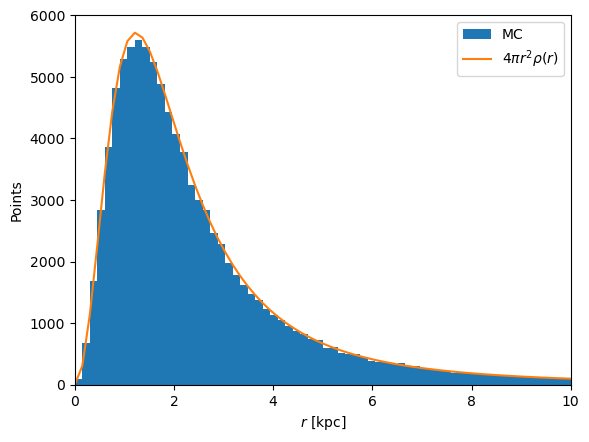

In [5]:
# Let's use a uniform binning from 0 to 10a
bins = np.linspace(0, 10, 100) * a_unit

fig = plt.figure()

# The theoretical distribution of points along r is given by 4 pi r^2 rho(r).
# This is because rho(r) is a 3D probability distrinbution over r, theta, phi.
# So to get the distribution of points along r, we need to integrate over theta and phi.
# int sin(theta) dtheta dphi rho(r) = 4 pi r^2 rho(r)

r2_rho = 4*np.pi*bins**2*(1+(bins)**2/a_unit**2)**(-5/2)

plt.hist(r*a_unit, bins=bins, label="MC")
plt.plot(bins, Nhit*r2_rho/np.sum(r2_rho), label=r"$4\pi r^2 \rho(r)$")
plt.xlim(0, 10)
plt.xlabel(r"$r$ [kpc]")
plt.ylabel(r"Points")
plt.legend()
plt.show()

Our theoretical expectation fits the MC well.

### Part (c) [20 points] 

Calculate the histogram of the energy $E=\frac{1}{2}v^2+\Phi(r)$ distribution of the phase space points and compare it with the analytic expression $f \propto (-E)^{7/2}$.

*Edit*: Why don't they match up? Consider the density of $(x, y, z, v_x, v_y, v_z)$ phase space states for a given $E$.

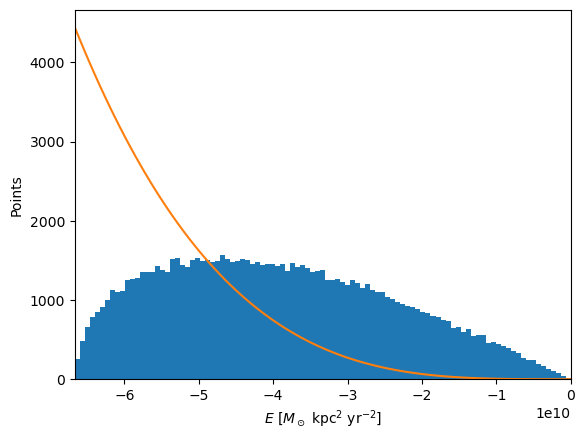

In [77]:
# Let's compute tha value of phi and energy per point to make a histogram
phi = -(M_unit/a_unit)*(1+r**2)**(-1/2)
e = (1/2)*(v*v_unit)**2 + phi


# We will use a uniform binning from  -GM/a to 0 with 100 bins
bins = np.linspace(-1, 0, 100) * (M_unit/a_unit)

f = (24*np.sqrt(2)/(7*np.pi**3))*(a_unit**2/M_unit**4)*(-bins)**(7/2)

fig = plt.figure()
plt.hist(e, bins=bins)
plt.plot(bins, Nhit*f/np.sum(f))
plt.xlim(-1*(M_unit/a_unit), 0)
plt.xlabel(r"$E$ [$M_\odot$ kpc$^2$ yr$^{-2}$]")
plt.ylabel("Points")
plt.show()

The two distributions do not match up because the phase space density in $(x, y, z, v_x, v_y, v_z)$ for each value of the energy $E$ is different.

Namely, for smaller energies, the phase space density is smaller, while for larger energies, the phase space density is larger.

Since the energy only depends on the radial distance $r = \sqrt{x^2+y^2+z^2}$ and velocity magnitude $v = \sqrt{v_x^2+v_y^2+v_z^2}$, the phase space density factor is $(4\pi r^2) (4\pi v^2)$.